In [88]:
import numpy 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
numpy.random.seed(10)

In [89]:
all_df = pd.read_csv("data/weather.csv")

In [90]:
all_df=all_df.drop(['RISK_MM'], axis=1)

In [91]:
X=all_df.drop(['RainTomorrow'], axis=1).values.astype('float64')

In [92]:
Y = all_df['RainTomorrow'].values.astype('int64')

In [93]:
X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.2, random_state=True) 
len(train_Features)

95672

In [94]:
test_Features[:2]

array([[-0.28057235, -0.88540995, -0.15604664,  0.58549966,  0.29969181,
         0.56686938,  0.71671696,  0.24811193, -0.16280797,  0.27738035,
        -0.47846775, -0.9189042 , -0.53271769],
       [ 0.74023477, -0.34150784, -0.274179  ,  0.43712836,  1.89126836,
         1.3737581 , -0.06742478,  1.02136889, -0.43047181, -0.40644069,
         0.40533611, -0.21640785, -0.53271769]])

In [95]:
train_Label[:4]

array([1, 1, 0, 1])

In [96]:
train_Features.shape

(95672, 13)

In [97]:
test_Label[:4]

array([1, 0, 0, 0])

In [98]:
train_Features = train_Features.reshape((train_Features.shape[0], train_Features.shape[1], 1))

In [99]:
test_Features = test_Features.reshape((test_Features.shape[0], test_Features.shape[1], 1))

In [100]:
from keras.utils import np_utils
train_Label = train_Label.reshape(train_Label.shape[0], 1)
test_Label= test_Label.reshape(test_Label.shape[0], 1)
train_Label=np_utils.to_categorical(train_Label)
test_Label=np_utils.to_categorical(test_Label)

In [101]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv1D,MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

In [102]:
model = Sequential()

In [103]:
model.add(Conv1D(filters=39*2,
                 kernel_size=3,
                 padding='valid',
                 input_shape=(13,1),
                 activation='relu'))

In [104]:
model.add(MaxPooling1D(pool_size=1))

In [105]:
model.add(Conv1D(filters=39,
                 kernel_size=3,
                 padding='valid', 
                 activation='relu'))

In [106]:
model.add(MaxPooling1D(pool_size=1))

In [107]:
model.add(Flatten())

In [108]:
model.add(Dense(13, activation='tanh'))

In [109]:
model.add(Dense(2,activation='sigmoid'))

In [110]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_7 (Conv1D)            (None, 11, 78)            312       
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, 11, 78)            0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 9, 39)             9165      
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 9, 39)             0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 351)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 13)                4576      
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 28        
Total para

In [111]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [112]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.2, 
                         epochs=60, 
                         batch_size=1500,verbose=1,callbacks=[early_stopping])

Train on 76537 samples, validate on 19135 samples
Epoch 1/60
76537/76537 [==============================] - 7s 96us/step - loss: 0.4504 - acc: 0.8065 - val_loss: 0.3710 - val_acc: 0.8433
Epoch 2/60
76537/76537 [==============================] - 6s 77us/step - loss: 0.3583 - acc: 0.8497 - val_loss: 0.3560 - val_acc: 0.8485
Epoch 3/60
76537/76537 [==============================] - 6s 81us/step - loss: 0.3509 - acc: 0.8522 - val_loss: 0.3527 - val_acc: 0.8481
Epoch 4/60
76537/76537 [==============================] - 7s 86us/step - loss: 0.3482 - acc: 0.8529 - val_loss: 0.3528 - val_acc: 0.8500
Epoch 5/60
76537/76537 [==============================] - 6s 77us/step - loss: 0.3463 - acc: 0.8530 - val_loss: 0.3504 - val_acc: 0.8506
Epoch 6/60
76537/76537 [==============================] - 6s 76us/step - loss: 0.3448 - acc: 0.8541 - val_loss: 0.3477 - val_acc: 0.8504
Epoch 7/60
76537/76537 [==============================] - 6s 76us/step - loss: 0.3429 - acc: 0.8546 - val_loss: 0.3452 - val_acc

In [113]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

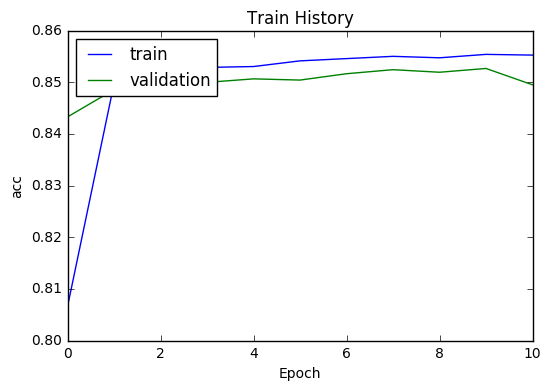

In [114]:
show_train_history(train_history,'acc','val_acc')

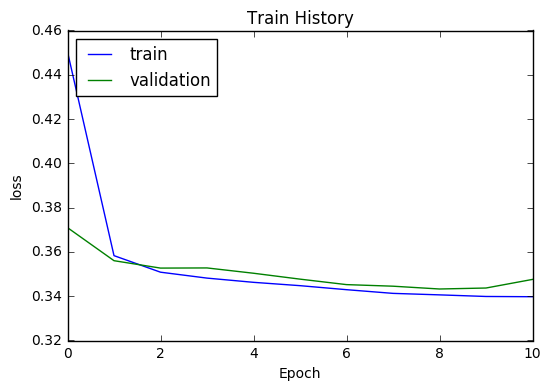

In [115]:
show_train_history(train_history,'loss','val_loss')

In [116]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

23918/23918 [==============================] - 1s 56us/step


In [117]:
scores[1]

0.8491512668283301